In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

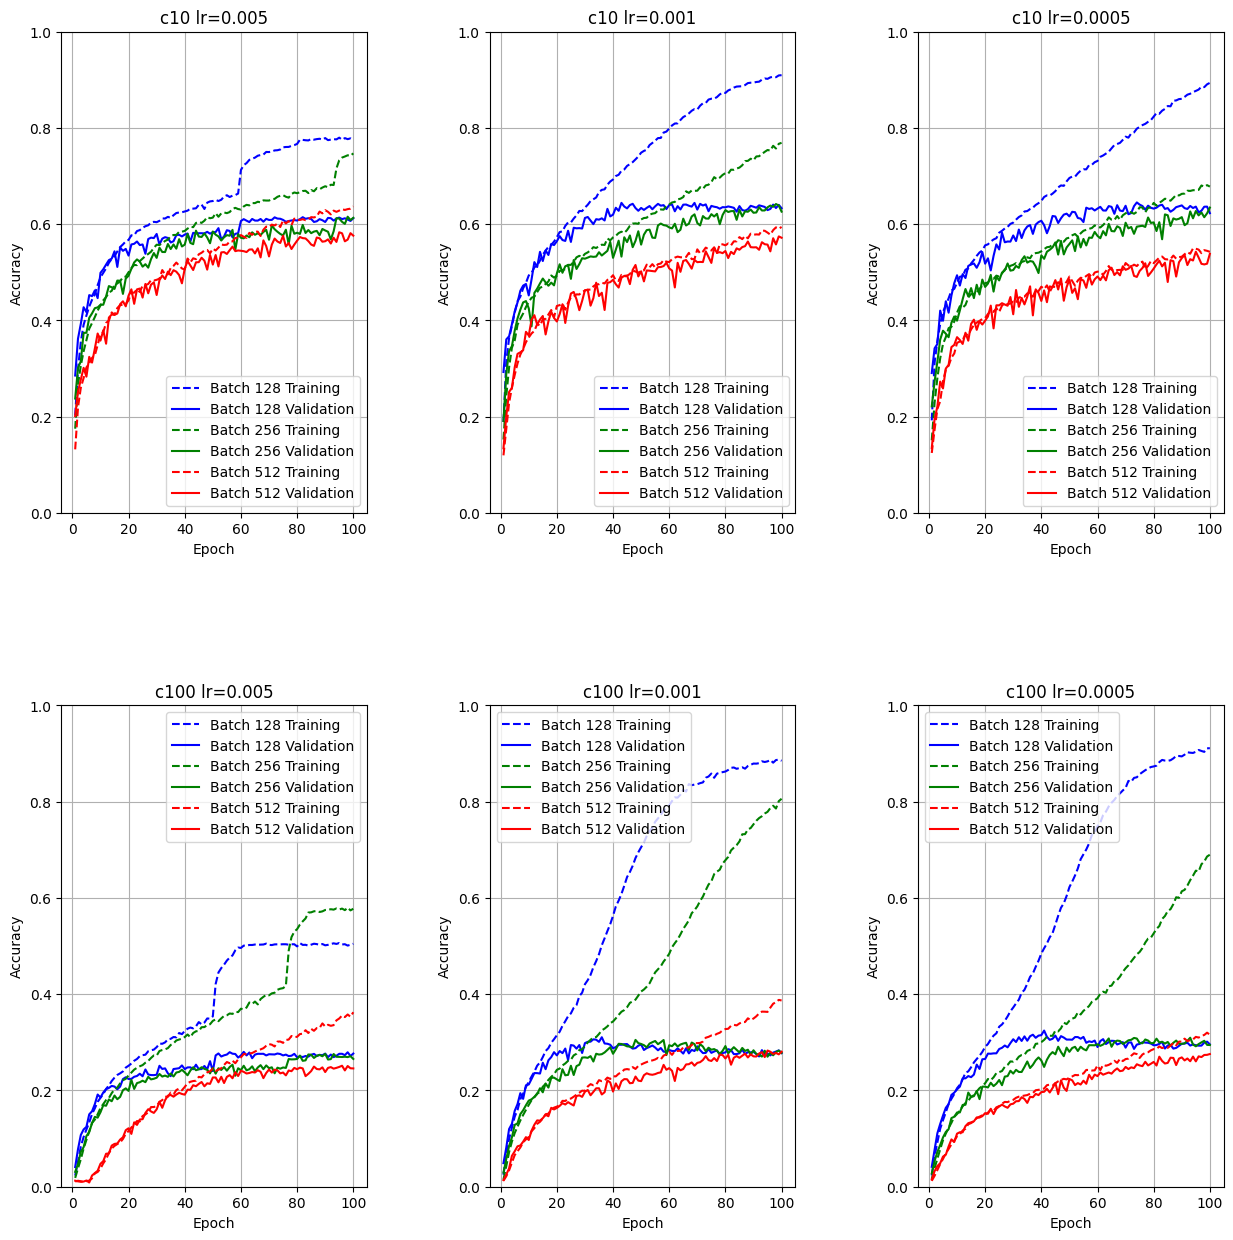

In [2]:
datasets = ['c10', 'c100']
learning_rates = ['0.005', '0.001', '0.0005']
batch_sizes = ['128', '256', '512']
colors = {'128': 'blue', '256': 'green', '512': 'red'}  

fig, axs = plt.subplots(2, 3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)  

subplot_counter = 0

for dataset in datasets:
    for lr in learning_rates:
        ax = axs[subplot_counter // 3, subplot_counter % 3]
        
        for batch_size in batch_sizes:
            file_name = f'./results/results_{dataset}_lr{lr}_batch{batch_size}.csv'
            data = pd.read_csv(file_name)
            
            color = colors[batch_size]  
            ax.plot(data['Epoch']+1, data['Training Accuracy'], label=f'Batch {batch_size} Training', color=color, linestyle='dashed')
            ax.plot(data['Epoch']+1, data['Validation Accuracy'], label=f'Batch {batch_size} Validation', color=color)
        
        ax.set_ylim([0, 1])
        ax.set_title(f'{dataset} lr={lr}')
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Accuracy')
        ax.legend()
        ax.grid()
        
        subplot_counter += 1

plt.savefig('./images/tuning.png' , dpi=300)
plt.show()

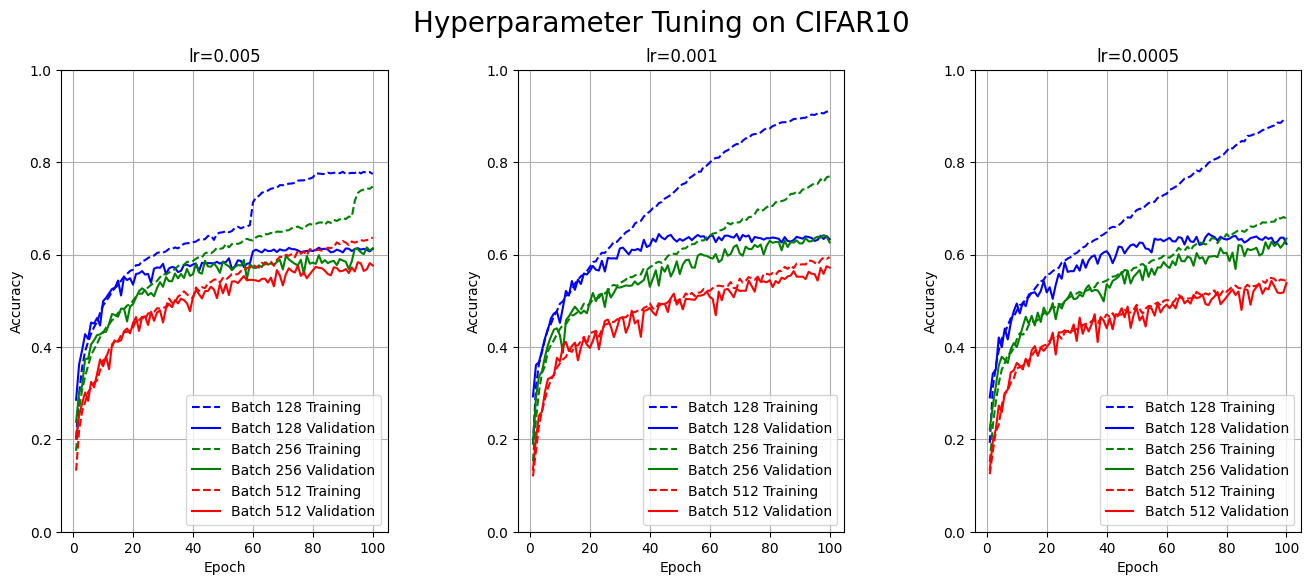

In [3]:
learning_rates = ['0.005', '0.001', '0.0005']
batch_sizes = ['128', '256', '512']
colors = {'128': 'blue', '256': 'green', '512': 'red'}  

fig, axs = plt.subplots(1, 3, figsize=(16, 6))
fig.subplots_adjust(hspace=0.4, wspace=0.4)  #
subplot_counter = 0

for lr in learning_rates:
    ax = axs[subplot_counter]
        
    for batch_size in batch_sizes:
        file_name = f'./results/results_c10_lr{lr}_batch{batch_size}.csv'
        data = pd.read_csv(file_name)
            
        color = colors[batch_size] 
        ax.plot(data['Epoch']+1, data['Training Accuracy'], label=f'Batch {batch_size} Training', color=color, linestyle='dashed')
        ax.plot(data['Epoch']+1, data['Validation Accuracy'], label=f'Batch {batch_size} Validation', color=color)
        
    ax.set_ylim([0, 1])
    ax.set_title(f'lr={lr}')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')
    ax.legend()
    ax.grid()
        
    subplot_counter += 1
fig.suptitle('Hyperparameter Tuning on CIFAR10', fontsize=20)
plt.savefig('./images/c10_tuning.png' , dpi=300)
plt.show()

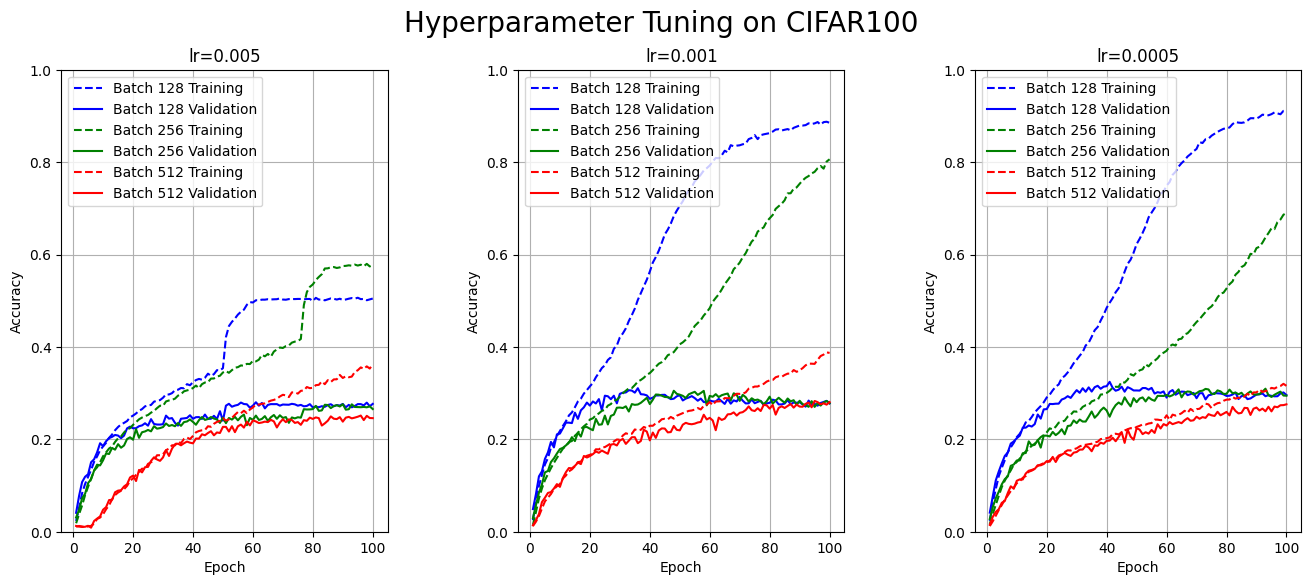

In [4]:
learning_rates = ['0.005', '0.001', '0.0005']
batch_sizes = ['128', '256', '512']
colors = {'128': 'blue', '256': 'green', '512': 'red'}  

fig, axs = plt.subplots(1, 3, figsize=(16, 6))
fig.subplots_adjust(hspace=0.4, wspace=0.4)  
subplot_counter = 0

for lr in learning_rates:
    ax = axs[subplot_counter]
        
    for batch_size in batch_sizes:
        file_name = f'./results/results_c100_lr{lr}_batch{batch_size}.csv'
        data = pd.read_csv(file_name)

        color = colors[batch_size]  
        ax.plot(data['Epoch']+1, data['Training Accuracy'], label=f'Batch {batch_size} Training', color=color, linestyle='dashed')
        ax.plot(data['Epoch']+1, data['Validation Accuracy'], label=f'Batch {batch_size} Validation', color=color)
        
    ax.set_ylim([0, 1])
    ax.set_title(f'lr={lr}')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')
    ax.legend(loc='upper left')
    ax.grid()
        
    subplot_counter += 1

fig.suptitle('Hyperparameter Tuning on CIFAR100', fontsize=20)
plt.savefig('./images/c100_tuning.png' , dpi=300)
plt.show()

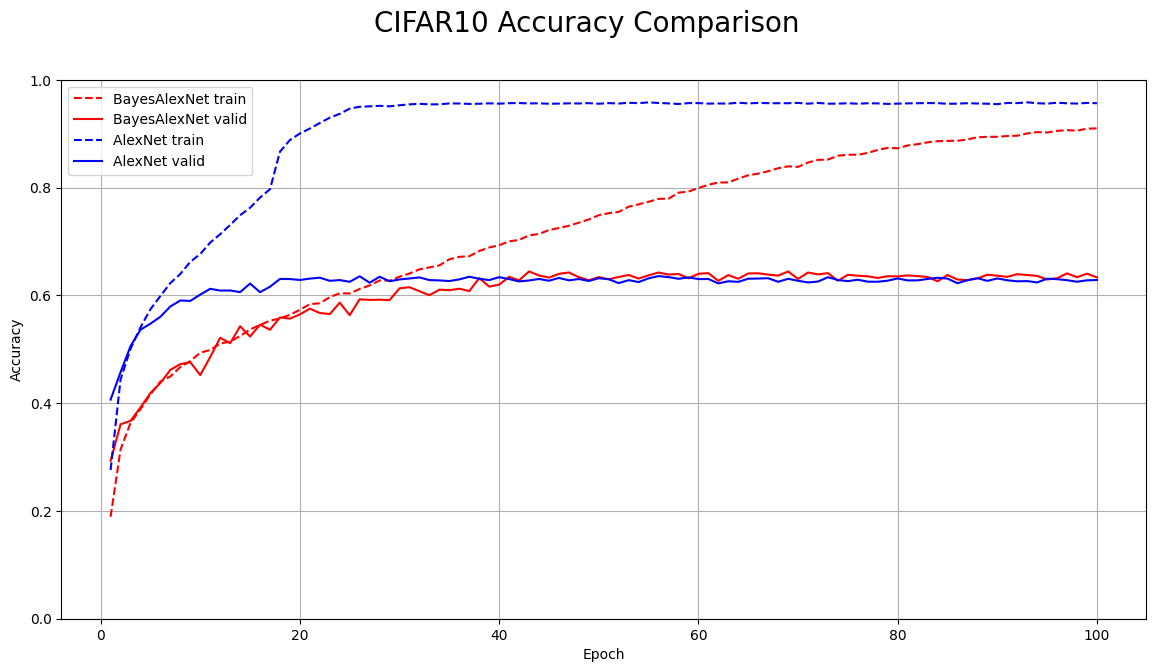

In [10]:
b_c10 = pd.read_csv('./results/results_c10_lr0.001_batch128.csv')
f_c10 = pd.read_csv('./results/results_f10_lr0.001_batch128.csv')

fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(b_c10['Epoch']+1, b_c10['Training Accuracy'], label='BayesAlexNet train', color='red', linestyle='dashed')
ax.plot(b_c10['Epoch']+1, b_c10['Validation Accuracy'], label='BayesAlexNet valid', color='red', linestyle='solid')
ax.plot(f_c10['Epoch']+1, f_c10['Training Accuracy'], label='AlexNet train', color='blue', linestyle='dashed')
ax.plot(f_c10['Epoch']+1, f_c10['Validation Accuracy'], label='AlexNet valid', color='blue', linestyle='solid')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.set_ylim([0, 1])


plt.legend()
plt.grid()
fig.suptitle('CIFAR10 Accuracy Comparison', fontsize=20)
plt.savefig('./images/c10_comparison.png' , dpi=300)
plt.show()

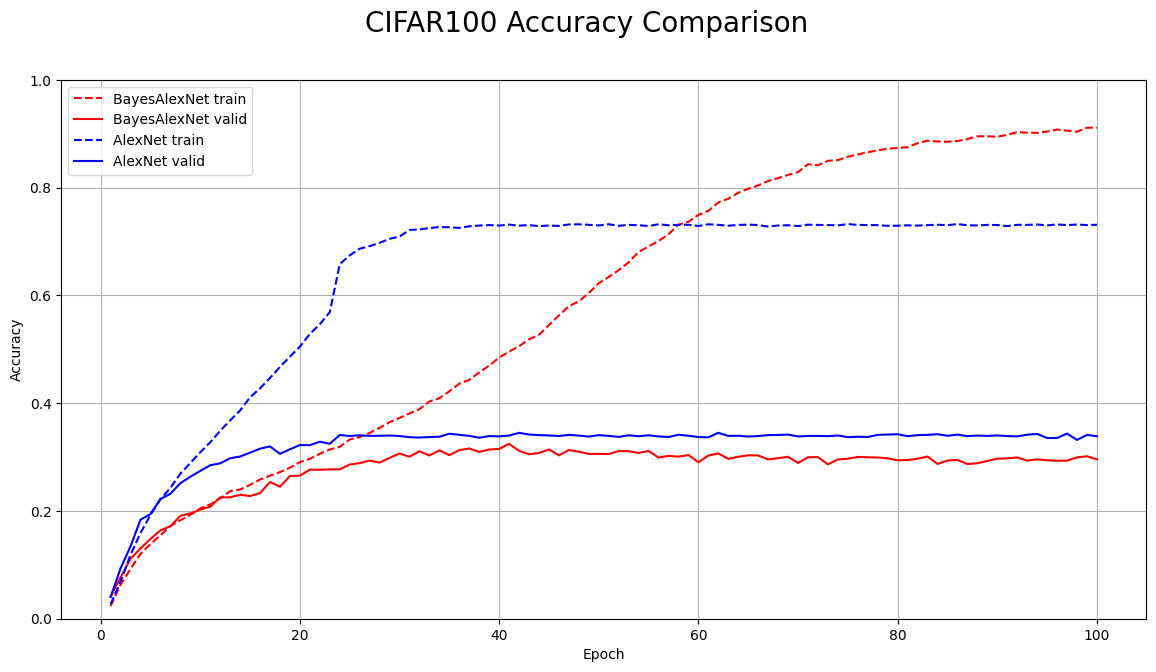

In [11]:
b_c100 = pd.read_csv('./results/results_c100_lr0.0005_batch128.csv')
f_c100 = pd.read_csv('./results/results_f100_lr0.0005_batch128.csv')

fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(b_c100['Epoch']+1, b_c100['Training Accuracy'], label='BayesAlexNet train', color='red', linestyle='dashed')
ax.plot(b_c100['Epoch']+1, b_c100['Validation Accuracy'], label='BayesAlexNet valid', color='red', linestyle='solid')
ax.plot(f_c100['Epoch']+1, f_c100['Training Accuracy'], label='AlexNet train', color='blue', linestyle='dashed')
ax.plot(f_c100['Epoch']+1, f_c100['Validation Accuracy'], label='AlexNet valid', color='blue', linestyle='solid')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.set_ylim([0, 1])

plt.legend()
plt.grid()
fig.suptitle('CIFAR100 Accuracy Comparison', fontsize=20)
plt.savefig('./images/c100_comparison.png' , dpi=300)
plt.show()

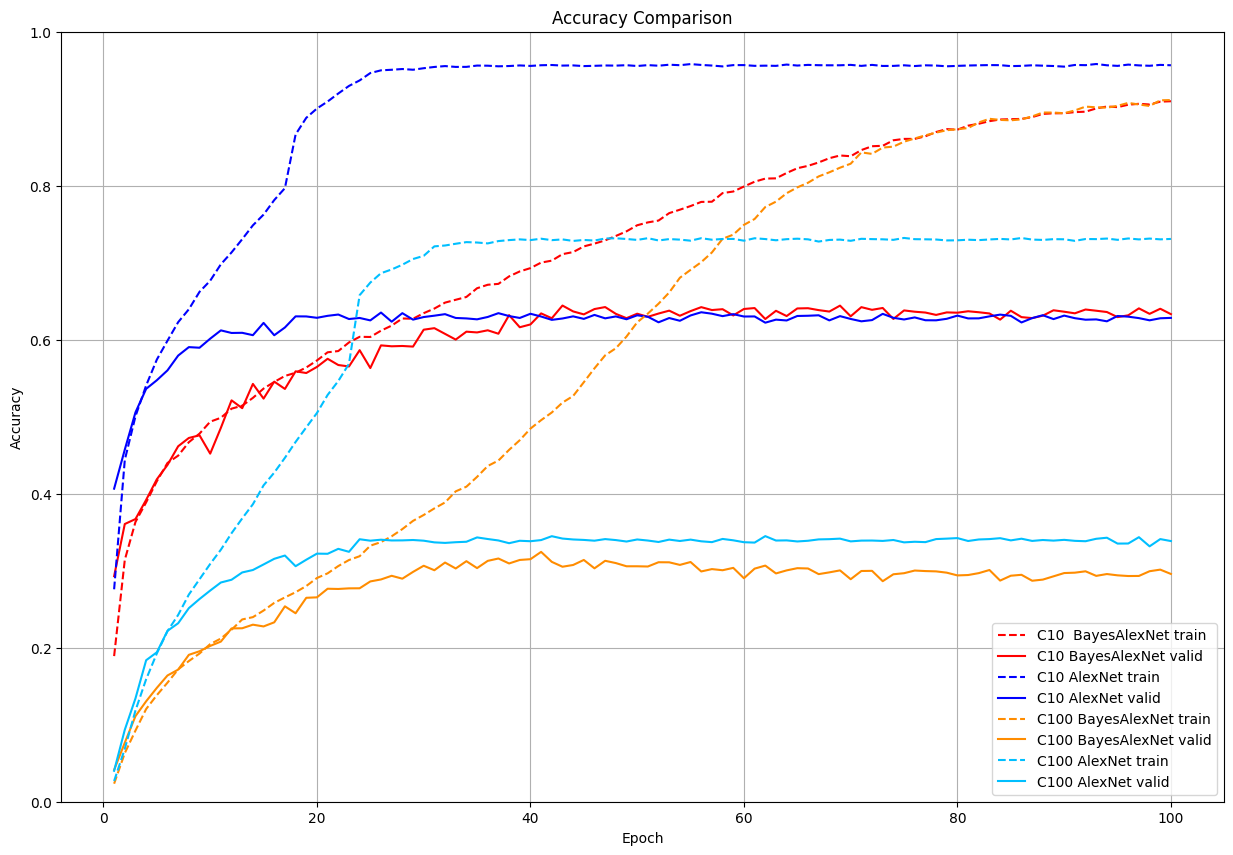

In [12]:
# Load the CSV file into a pandas DataFrame
b_c10 = pd.read_csv('./results/results_c10_lr0.001_batch128.csv')
f_c10 = pd.read_csv('./results/results_f10_lr0.001_batch128.csv')
b_c100 = pd.read_csv('./results/results_c100_lr0.0005_batch128.csv')
f_c100 = pd.read_csv('./results/results_f100_lr0.0005_batch128.csv')

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the second function on the second subplot
ax.plot(b_c10['Epoch']+1, b_c10['Training Accuracy'], label='C10  BayesAlexNet train', color='red', linestyle='dashed')
ax.plot(b_c10['Epoch']+1, b_c10['Validation Accuracy'], label='C10 BayesAlexNet valid', color='red', linestyle='solid')
ax.plot(f_c10['Epoch']+1, f_c10['Training Accuracy'], label='C10 AlexNet train', color='blue', linestyle='dashed')
ax.plot(f_c10['Epoch']+1, f_c10['Validation Accuracy'], label='C10 AlexNet valid', color='blue', linestyle='solid')
ax.plot(b_c100['Epoch']+1, b_c100['Training Accuracy'], label='C100 BayesAlexNet train', color='darkorange', linestyle='dashed')
ax.plot(b_c100['Epoch']+1, b_c100['Validation Accuracy'], label='C100 BayesAlexNet valid', color='darkorange', linestyle='solid')
ax.plot(f_c100['Epoch']+1, f_c100['Training Accuracy'], label='C100 AlexNet train', color='deepskyblue', linestyle='dashed')
ax.plot(f_c100['Epoch']+1, f_c100['Validation Accuracy'], label='C100 AlexNet valid', color='deepskyblue', linestyle='solid')
ax.set_title('Accuracy Comparison')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.set_ylim([0, 1])

# Display the plots
#plt.tight_layout()
plt.legend()
plt.grid()
#plt.savefig('./images/c10_comparison.png' , dpi=300)
plt.show()

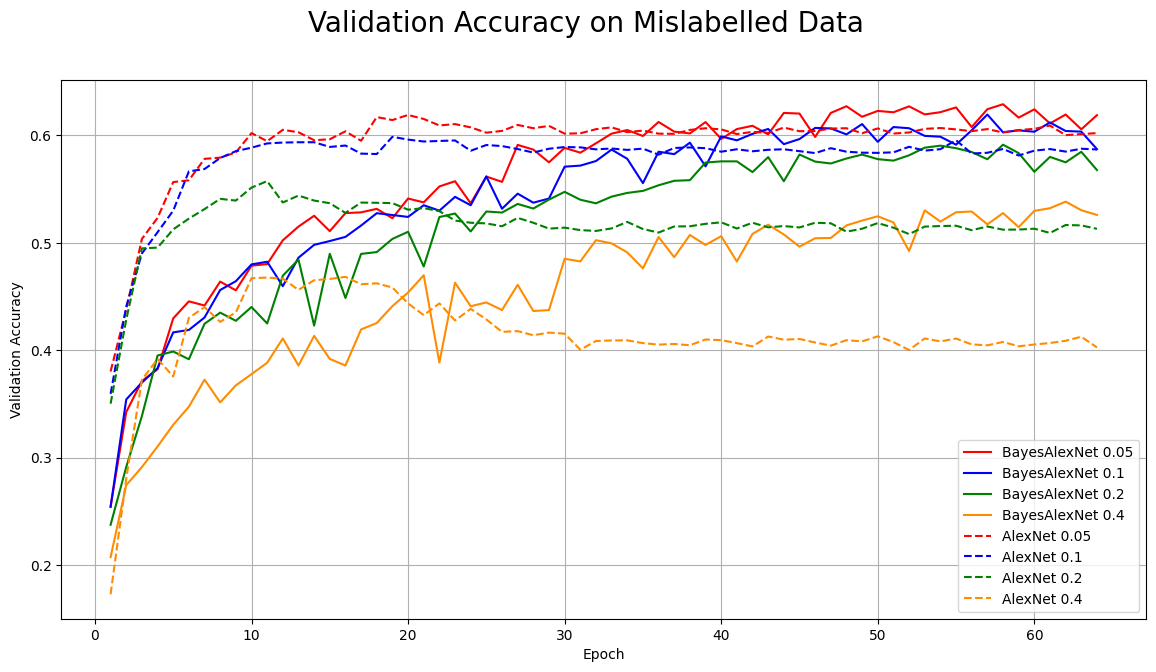

In [8]:
mislabel_perc = ['0.05', '0.1', '0.2', '0.4']
cnns = ['bayesian', 'frequentist']
linestyles = {'bayesian': 'solid', 'frequentist': 'dashed'}
colors = {'0.05': 'red', '0.1': 'blue', '0.2': 'green', '0.4': 'darkorange'}

fig, ax = plt.subplots(figsize=(14, 7))

for cnn in cnns:
    if cnn == 'bayesian':
        NN = 'BayesAlexNet'
    else:
        NN = 'AlexNet'
    
    for perc in mislabel_perc:
        file_name = f'./mislabel_results/results_{cnn}_mislabel_{perc}.csv'
        data = pd.read_csv(file_name)
        data = data[data['Epoch'] < 64]
            
        color = colors[perc]  
        linestyle = linestyles[cnn]
        ax.plot(data['Epoch']+1, data['Validation Accuracy'], label=f'{NN} {perc}', color=color, linestyle=linestyle)
        
ax.set_xlabel('Epoch')
ax.set_ylabel('Validation Accuracy')
ax.legend()
ax.grid()

fig.suptitle('Validation Accuracy on Mislabelled Data', fontsize=20)
plt.savefig('./images/mislabel_plot.png' , dpi=300)
plt.show()

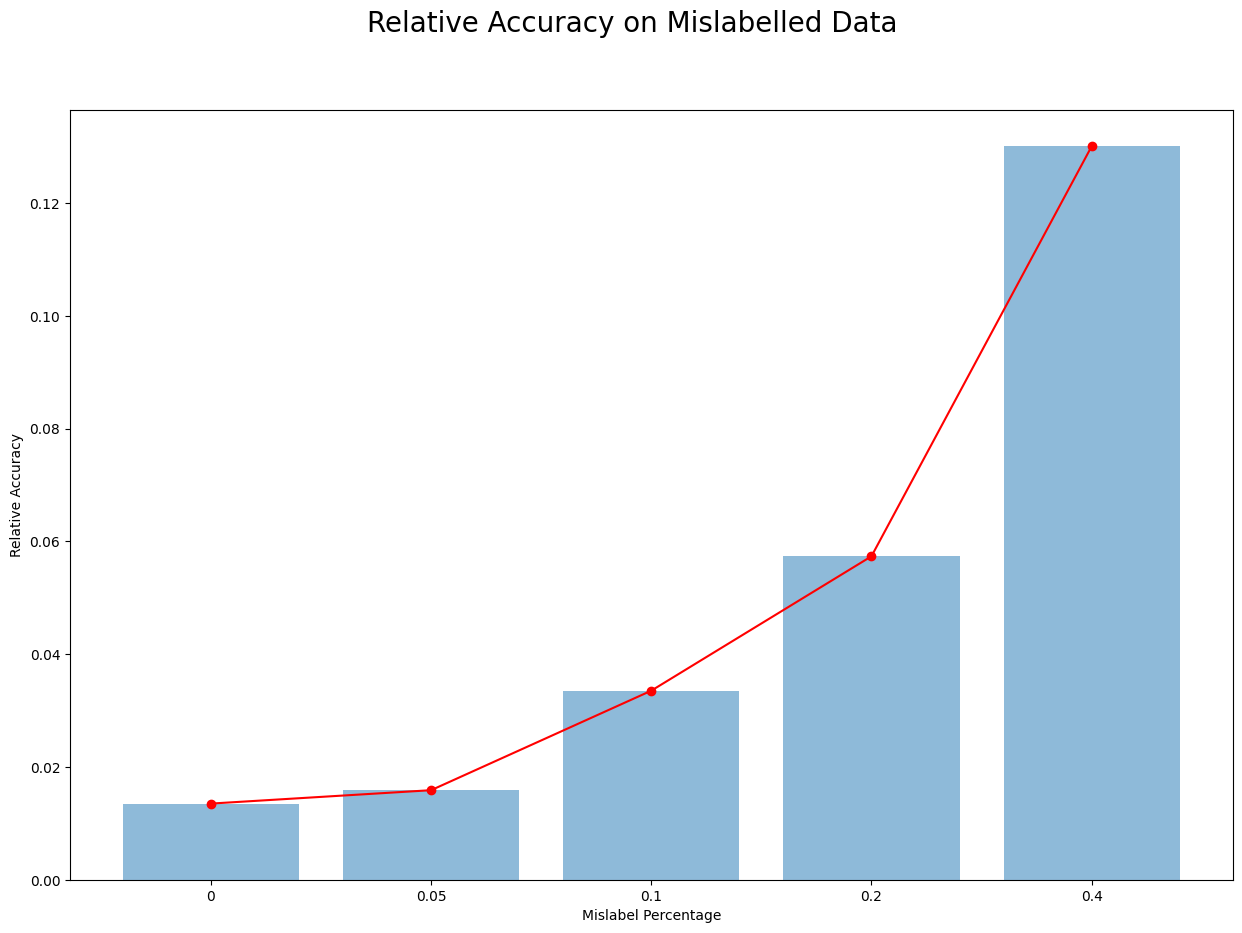

In [9]:
fig, ax = plt.subplots(figsize=(15, 10))

bayes_acc = []
freq_acc = []

for cnn in cnns:  
    if cnn == 'bayesian':
        file = f'./results/results_c10_lr0.001_batch128.csv'
        NN = 'BayesAlexNet'
    else:
        file = f'./results/results_f10_lr0.001_batch128.csv'
        NN = 'AlexNet'
        
    old_data = pd.read_csv(file)
    max_values = [old_data['Validation Accuracy'].max()]
    for perc in mislabel_perc:
        file_name = f'./mislabel_results/results_{cnn}_mislabel_{perc}.csv'
        data = pd.read_csv(file_name)
        max_value = data['Validation Accuracy'].max()  
        max_values.append(max_value)

    if NN == 'BayesAlexNet':
        bayes_acc = max_values
    else:
        freq_acc = max_values

y_values = [1 - (f/b) for f, b in zip(freq_acc, bayes_acc)]
x_values = ['0', '0.05', '0.1', '0.2', '0.4']

ax.bar(x_values, y_values, alpha=0.5)
ax.plot(x_values, y_values, color='red', marker='o')
ax.set_xlabel('Mislabel Percentage')
ax.set_ylabel('Relative Accuracy')

fig.suptitle('Relative Accuracy on Mislabelled Data', fontsize=20)
plt.savefig('./images/trend.png' , dpi=300)
plt.show()